# Sparse Modeling (Ridge, LASSO, Elastic net)

## Bias and Variance Trade-off
We need to optimize number of variable (variable selection).  
With fewer variables, it is difficult to get high accuracy for both training set and test set. With too many variables, we expect to get higher accuracy for training set, but get lower accuracy for test set.
<img src="Bias_Variance_Trade-off2.png" width="1200">
Reference  
[SlideShare](https://www.slideshare.net/ShinyaShimizu/ss-11623505)  
[Dr.Scott Fortmann' Essays](http://scott.fortmann-roe.com/docs/BiasVariance.html)

Reference  
[Dr.Joseph E. Gonzalez's lecture note in UC Berkeley](https://people.eecs.berkeley.edu/~jegonzal/assets/slides/linear_regression.pdf)

## How to suppress model complexity?
One way to suppress a model complexity is to restrict value of regression coefficient (or weight).  
When a complexity of model is too high, regression coefficients tend to become higher.  
So if we restrict value of coefficient small, we expect to get simpler model.

Lasso (L1 Regularization), Ridge(L2 Regularization) and Elastic net are regression model with which we can restrict value of coefficient.  
In these models we try to get coefficient values with which we get both smaller error and smaller coefficient values.  
  
Regression coefficients of each model can be get by algorisms as below.  
  
### Lasso regression (L1 Regularization)  
$$
\beta_{Lasso} = argmin_{\beta}\left[(y - X\beta)^T (y-X\beta) + \lambda \sum_{j=1}^{p}|\beta_j| \right]
$$
  
### Ridge regression (L2 Regularization)  
$$
\beta_{Ridge} = argmin_{\beta}\left[(y - X\beta)^T (y-X\beta) + \lambda \sum_{j=1}^{p}\beta_j^2 \right]
$$

### Elastic net regression  
$$
\beta_{Elastic Net} = argmin_{\beta}\left[(y - X\beta)^T (y-X\beta) + \sum_{j=1}^{p} ( \lambda|\beta_j| + (1 - \lambda) \beta_j^2 )\right]
$$

<img src="Lasso_Ridge.png" width="800">

Reference  
[tekenuko's blog](http://tekenuko.hatenablog.com/entry/2017/11/18/214317)  
[Dr.Takashi J. OZAKI's blog](https://tjo.hatenablog.com/entry/2015/03/03/190000)

## Elastic Net

In [1]:
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
pd.set_option("display.max_rows", 10)

/Users/takumkawahara/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df['Dammy1'] = np.array(range(len(df))) * 0.01
df['Dammy2'] = np.array(range(len(df))) * 0.1
df['Dammy3'] = np.array(range(len(df))) * 1
df['Dammy4'] = np.array(range(len(df))) * 2
df['Dammy5'] = np.array(range(len(df))) * 4
df['Dammy6'] = np.array(range(len(df))) * 8
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Dammy1,Dammy2,Dammy3,Dammy4,Dammy5,Dammy6
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0.00,0.0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0.01,0.1,1,2,4,8
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,0.02,0.2,2,4,8,16
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,0.03,0.3,3,6,12,24
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,0.04,0.4,4,8,16,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,5.01,50.1,501,1002,2004,4008
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,5.02,50.2,502,1004,2008,4016
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,5.03,50.3,503,1006,2012,4024
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,5.04,50.4,504,1008,2016,4032


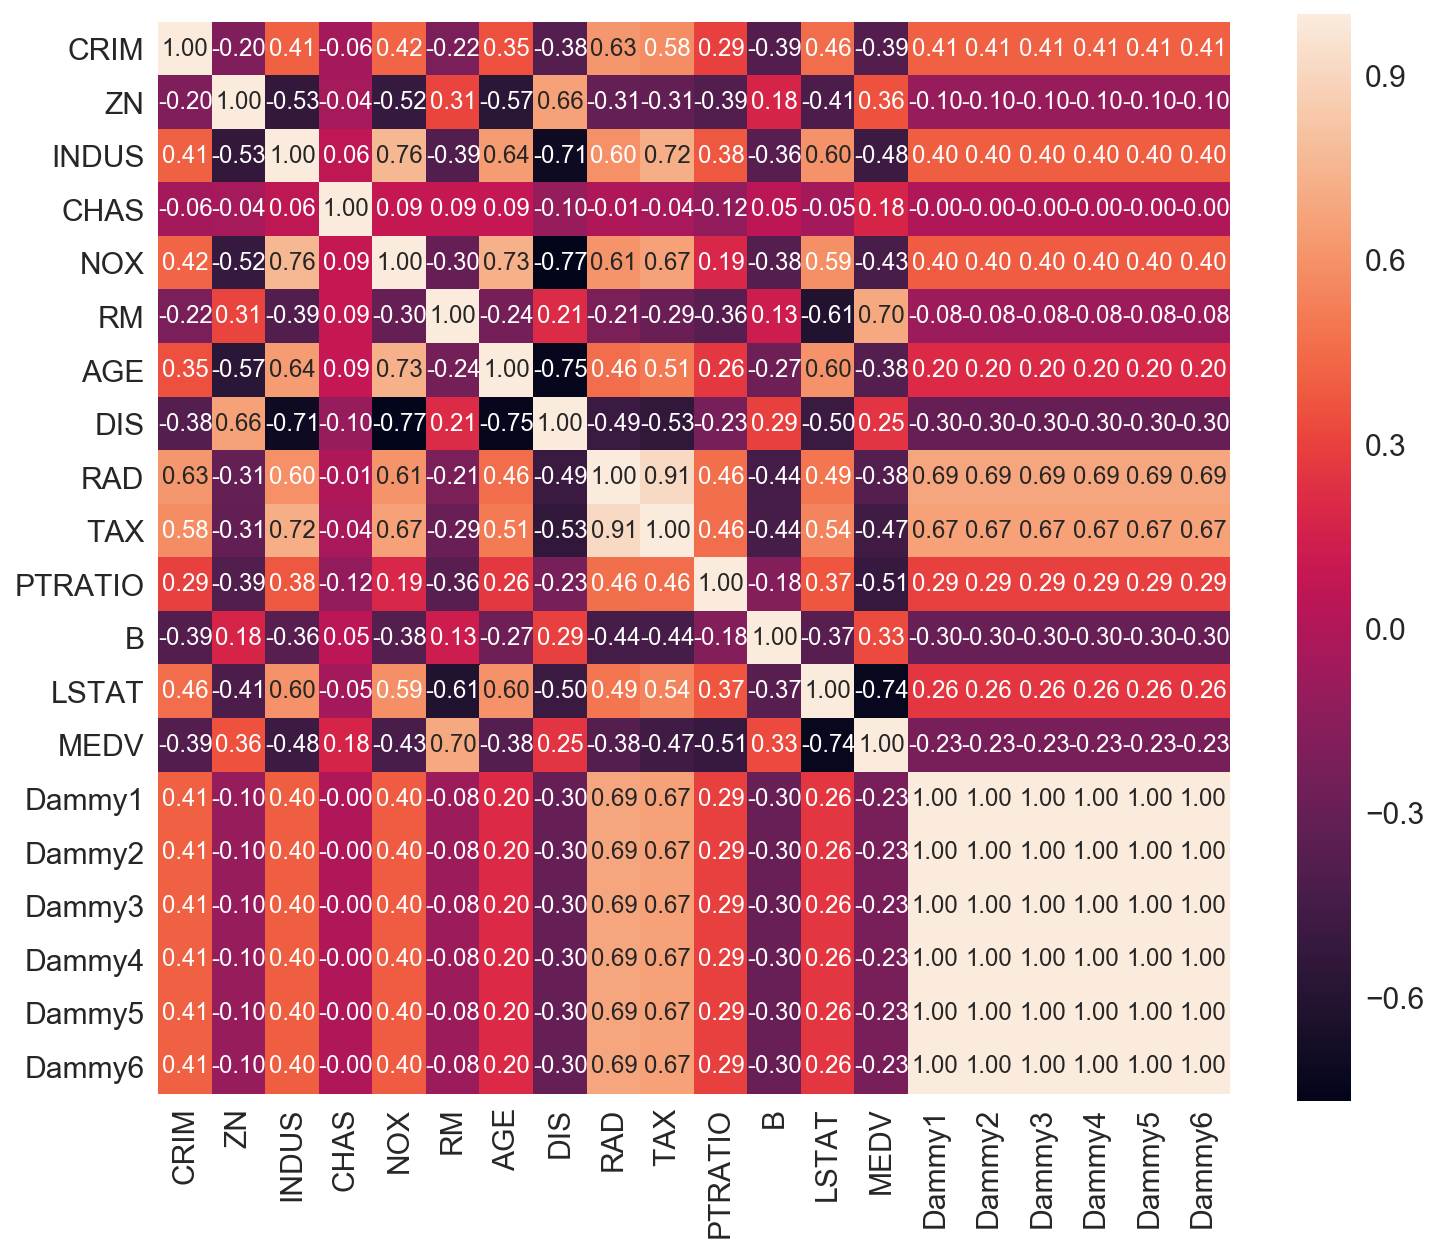

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV','Dammy1','Dammy2','Dammy3','Dammy4','Dammy5','Dammy6']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
plt.subplots(figsize=(12,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':12}, yticklabels=cols, xticklabels=cols)
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
y = df['MEDV'].values
X = df.drop('MEDV', axis=1).values

In [7]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1, 1))


In [8]:
X_cname = df.drop('MEDV', axis=1).columns.values

In [9]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.20, random_state=1)

In [18]:
from sklearn import linear_model
reg = linear_model.ElasticNet(l1_ratio = 0.5 ,alpha = 1,random_state=0)
reg.fit(X_train, y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

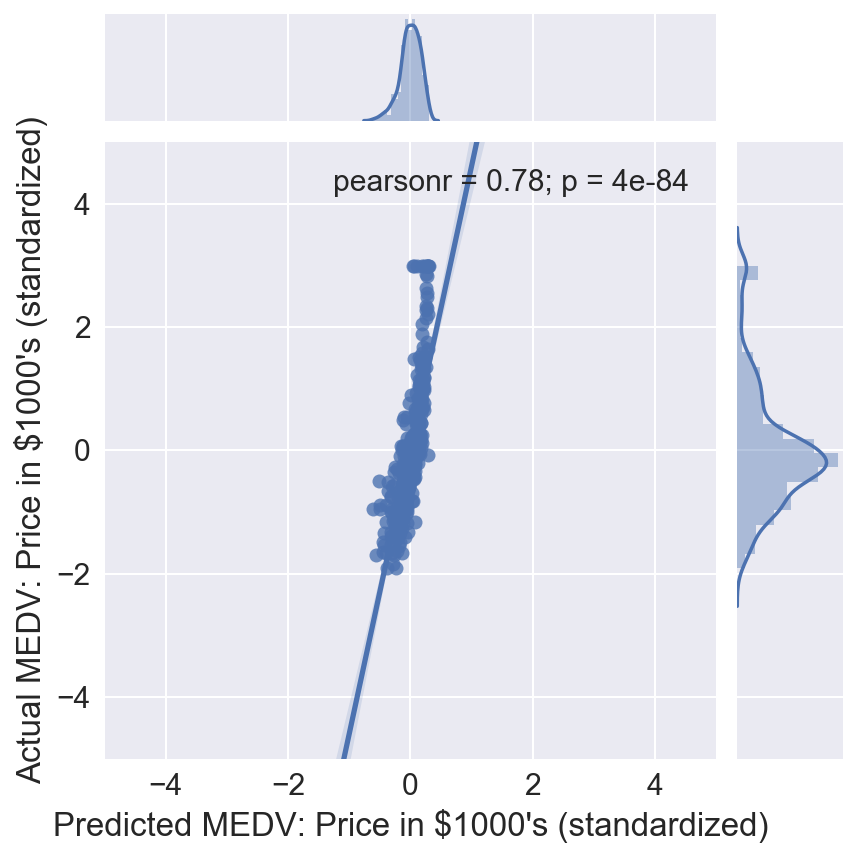

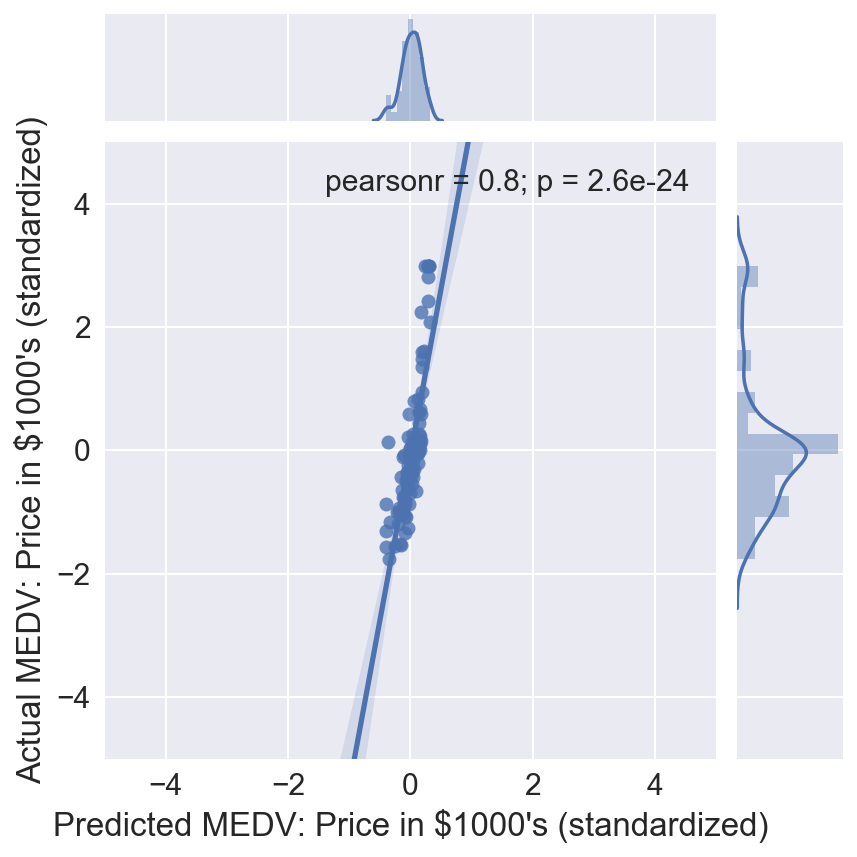

In [19]:
import seaborn as sns
sns.jointplot(reg.predict(X_train).flatten(), y_train.flatten(), kind="reg",ylim=[-5, 5], xlim=[-5, 5])
plt.xlabel('Predicted MEDV: Price in $1000\'s (standardized)')
plt.ylabel('Actual MEDV: Price in $1000\'s (standardized)')
plt.show()


sns.jointplot(reg.predict(X_test).flatten(), y_test.flatten(), kind="reg",ylim=[-5, 5], xlim=[-5, 5])
plt.xlabel('Predicted MEDV: Price in $1000\'s (standardized)')
plt.ylabel('Actual MEDV: Price in $1000\'s (standardized)')
plt.show()

[scikit-learn HP](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)  


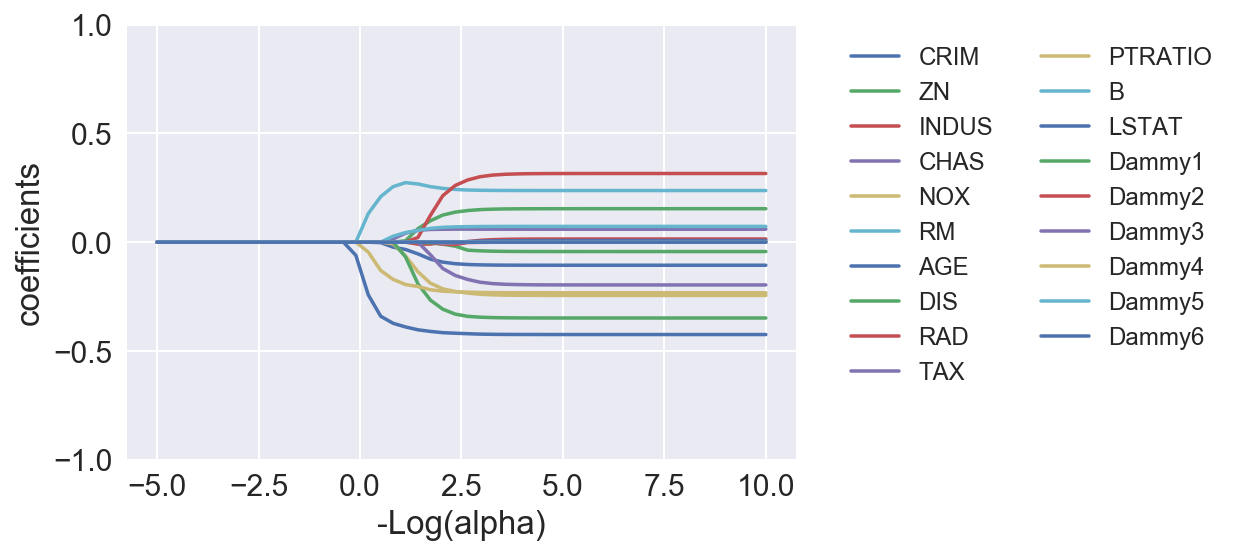

In [41]:
alphas = np.logspace(5,-10,50)
df_coef = pd.DataFrame(index = X_cname, columns = alphas)
for each in alphas:
    elasticnet = linear_model.ElasticNet(alpha = each, l1_ratio = 0.5, random_state=0)
    elasticnet.fit(X_train, y_train)
    df_coef[each] = elasticnet.coef_.T

for i in range(len(X_cname)):
    plt.plot(-np.log10(df_coef.T.index.values), df_coef.T.values[:,i], label=X_cname[i])

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), shadow=True, ncol=2, fontsize=12)
plt.ylim(-1,1)
plt.show()

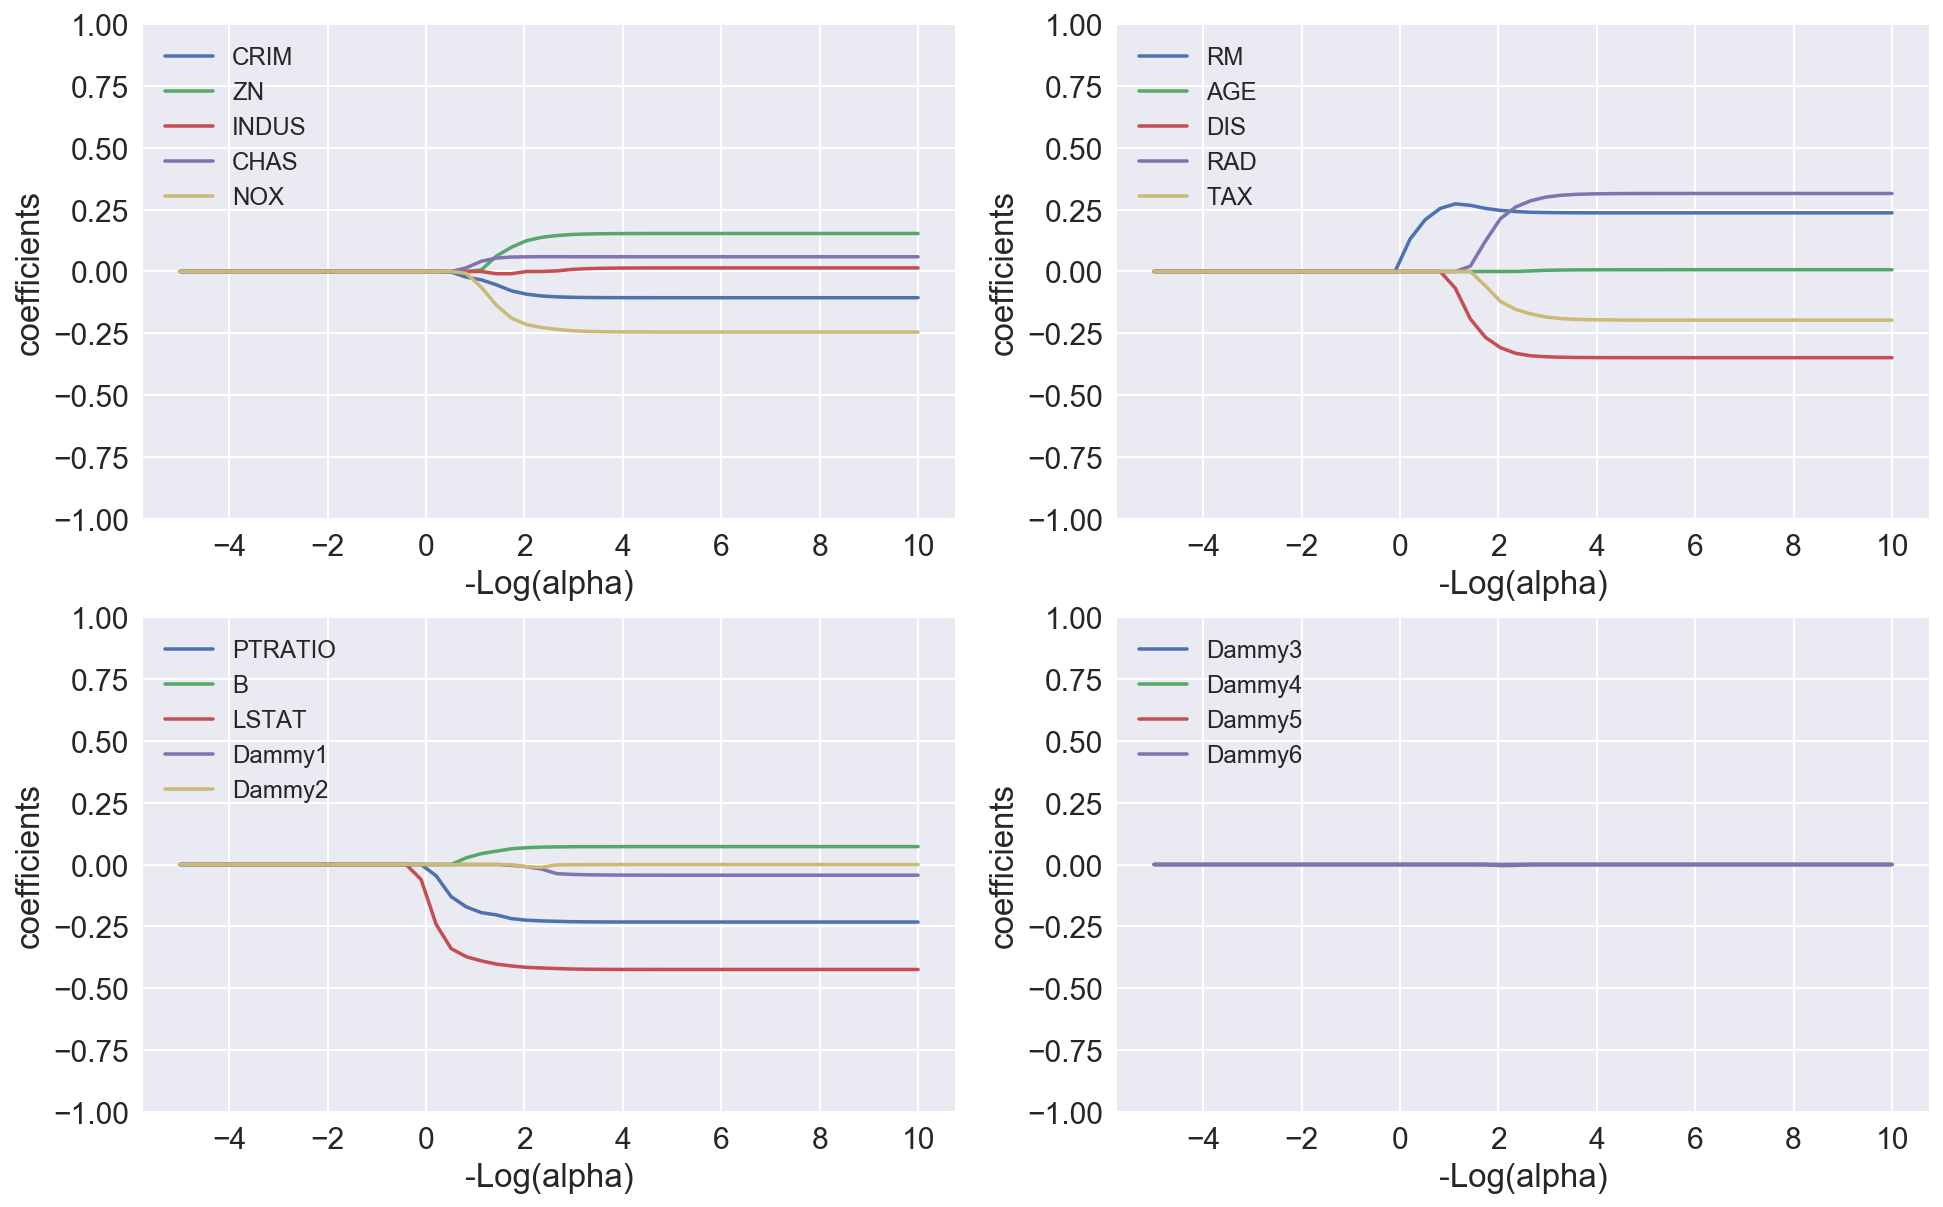

In [23]:
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
y_max=1
y_min=-1
for i in range(0, 5):
    plt.plot(-np.log10(df_coef.T.index.values), df_coef.T.values[:,i], label=X_cname[i])
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.legend(loc='upper left', shadow=True, ncol=1, fontsize=12)
plt.ylim(y_min, y_max)

plt.subplot(2, 2, 2)
for i in range(5, 10):
    plt.plot(-np.log10(df_coef.T.index.values), df_coef.T.values[:,i], label=X_cname[i])
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.legend(loc='upper left', shadow=True, ncol=1, fontsize=12)
plt.ylim(y_min, y_max)

plt.subplot(2, 2, 3)
for i in range(10, 15):
    plt.plot(-np.log10(df_coef.T.index.values), df_coef.T.values[:,i], label=X_cname[i])
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.legend(loc='upper left', shadow=True, ncol=1, fontsize=12)
plt.ylim(y_min, y_max)

plt.subplot(2, 2, 4)
for i in range(15, 19):
    plt.plot(-np.log10(df_coef.T.index.values), df_coef.T.values[:,i], label=X_cname[i])
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.legend(loc='upper left', shadow=True, ncol=1, fontsize=12)
plt.ylim(y_min, y_max)
plt.show()

In [24]:
def AIC(y, yhat, model):
    from sklearn import metrics
    import math
    aic = len(y)*math.log(2*math.pi*((y - yhat)**2).sum()/len(y)) + len(y) + 2*(model.coef_).size
    return aic

In [25]:
alphas = np.logspace(5,-10,50)
df_scores_train = []
df_aic_train = []
df_scores_test = []
df_aic_test = []
for each in alphas:
    elasticnet = linear_model.ElasticNet(alpha = each, l1_ratio = 0.5, random_state=0)
    elasticnet.fit(X_std, y_std)
    df_scores_train.append(elasticnet.score(X_train, y_train))
    df_aic_train.append(AIC(y_train, elasticnet.predict(X_train).flatten(), elasticnet))
    df_scores_test.append(elasticnet.score(X_test, y_test))
    df_aic_test.append(AIC(y_test, elasticnet.predict(X_test).flatten(), elasticnet))

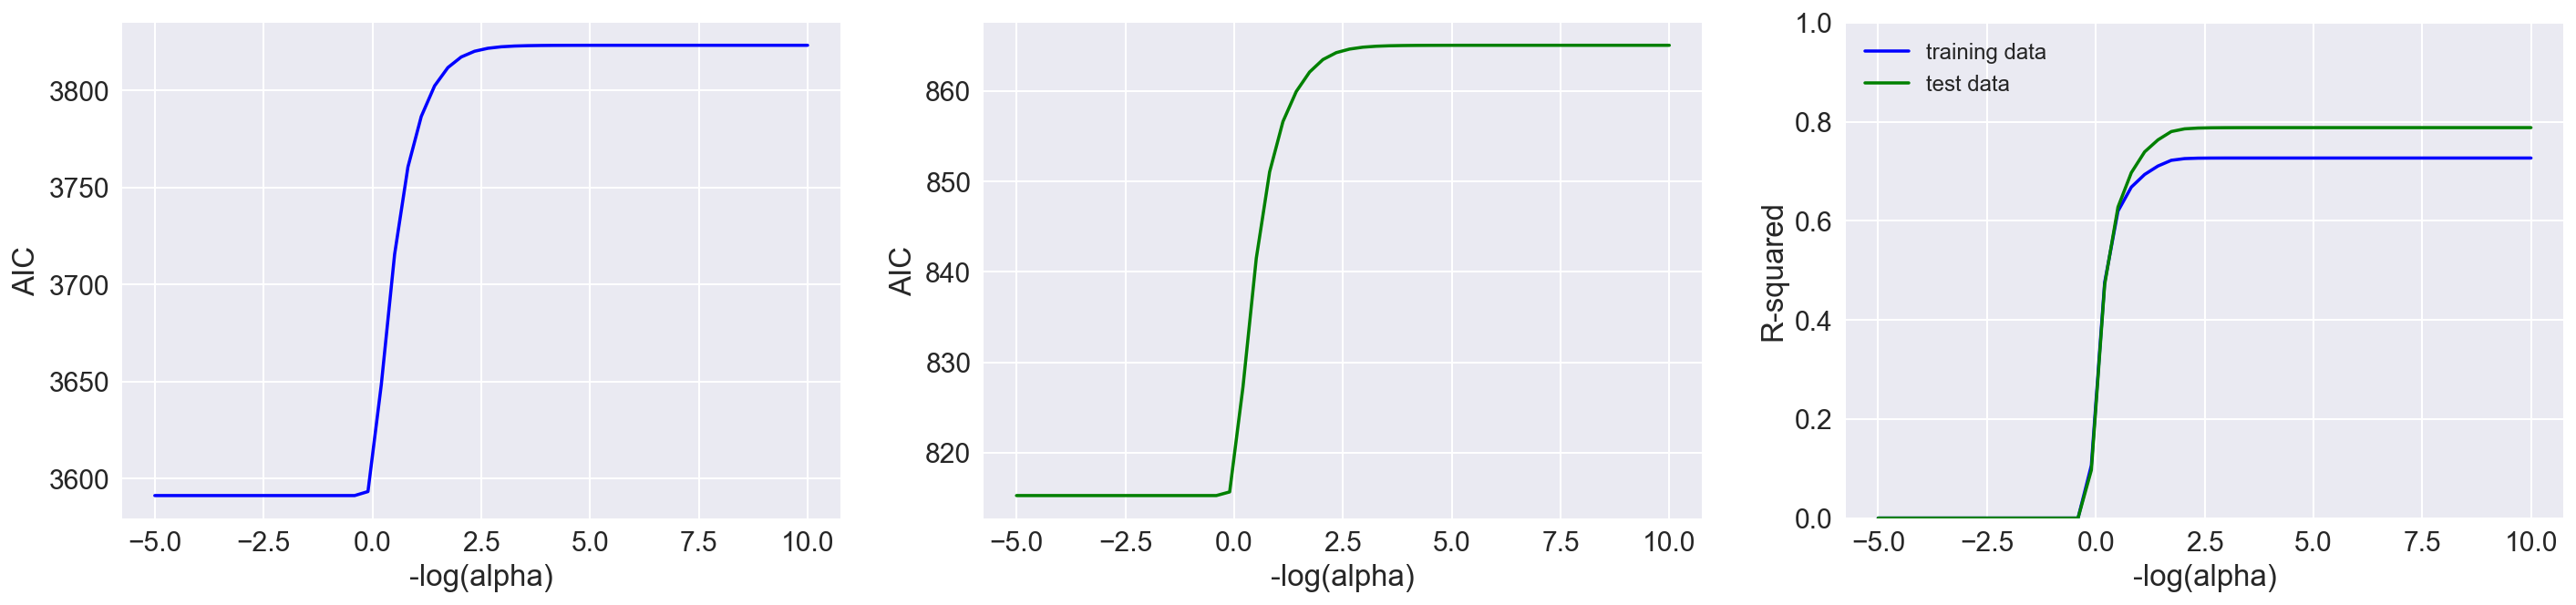

In [26]:
plt.figure(figsize=(24, 5))
plt.subplot(1, 3, 1)
plt.plot(-np.log10(alphas), df_aic_train, label="training data", color='blue')
plt.xlabel('-log(alpha)')
plt.ylabel('AIC')

plt.subplot(1, 3, 2)
plt.plot(-np.log10(alphas), df_aic_test, label="test data", color='green')
plt.xlabel('-log(alpha)')
plt.ylabel('AIC')

plt.subplot(1, 3, 3)
plt.plot(-np.log10(alphas), df_scores_train, label="training data", color='blue')
plt.plot(-np.log10(alphas), df_scores_test, label="test data", color='green')
plt.xlabel('-log(alpha)')
plt.ylabel('R-squared')
plt.ylim(0, 1)
plt.legend(loc='upper left', shadow=True, ncol=1, fontsize=12)
plt.show()

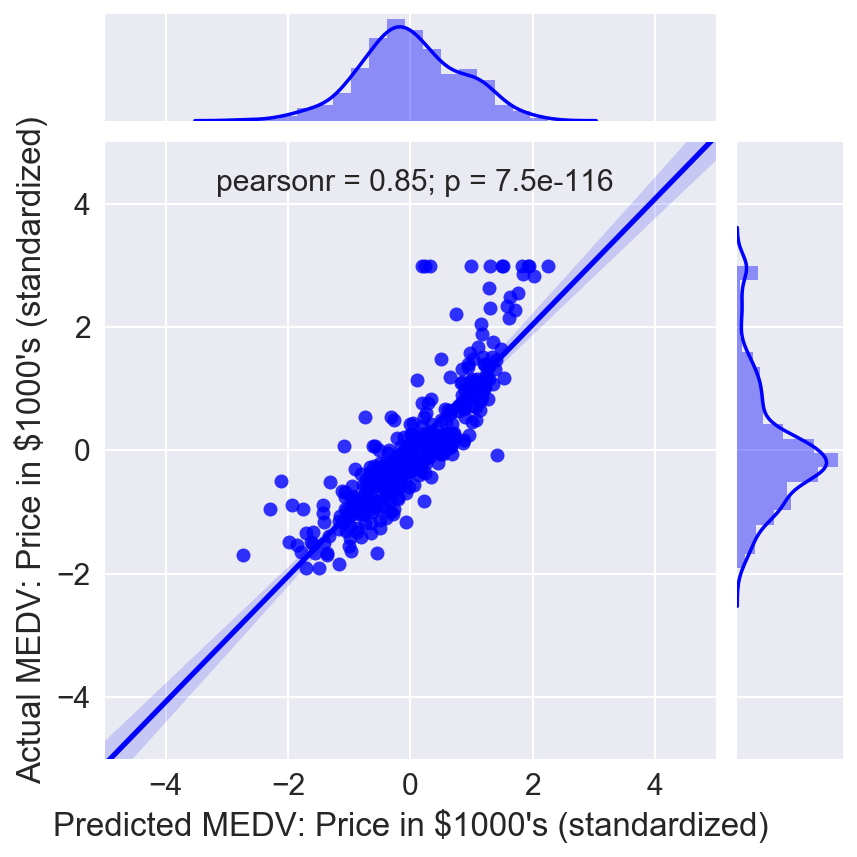

In [27]:
elasticnet = linear_model.ElasticNet(alpha = 10e-3, l1_ratio = 0.5, random_state=0)
elasticnet.fit(X_train, y_train)
sns.jointplot(elasticnet.predict(X_train).flatten(), y_train.flatten(), kind="reg",ylim=[-5, 5], xlim=[-5, 5], color="blue")
plt.xlabel('Predicted MEDV: Price in $1000\'s (standardized)')
plt.ylabel('Actual MEDV: Price in $1000\'s (standardized)')
plt.show()

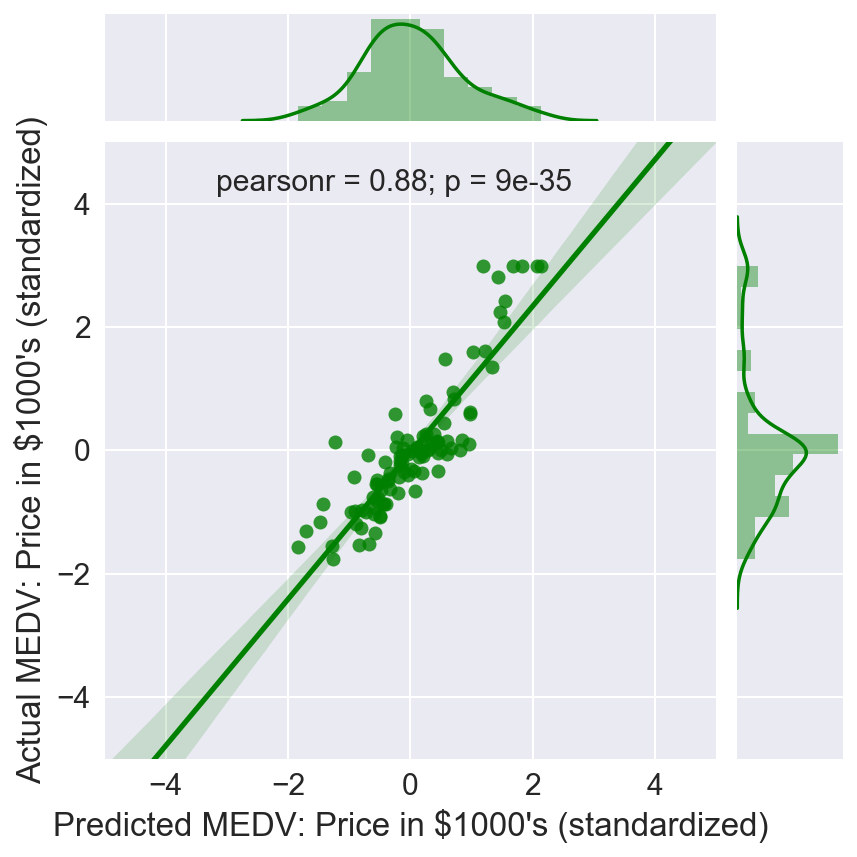

In [28]:
elasticnet = linear_model.ElasticNet(alpha = 10e-3, l1_ratio = 0.5, random_state=0)
elasticnet.fit(X_train, y_train)
sns.jointplot(elasticnet.predict(X_test).flatten(), y_test.flatten(), kind="reg",ylim=[-5, 5], xlim=[-5, 5], color="green")
plt.xlabel('Predicted MEDV: Price in $1000\'s (standardized)')
plt.ylabel('Actual MEDV: Price in $1000\'s (standardized)')
plt.show()

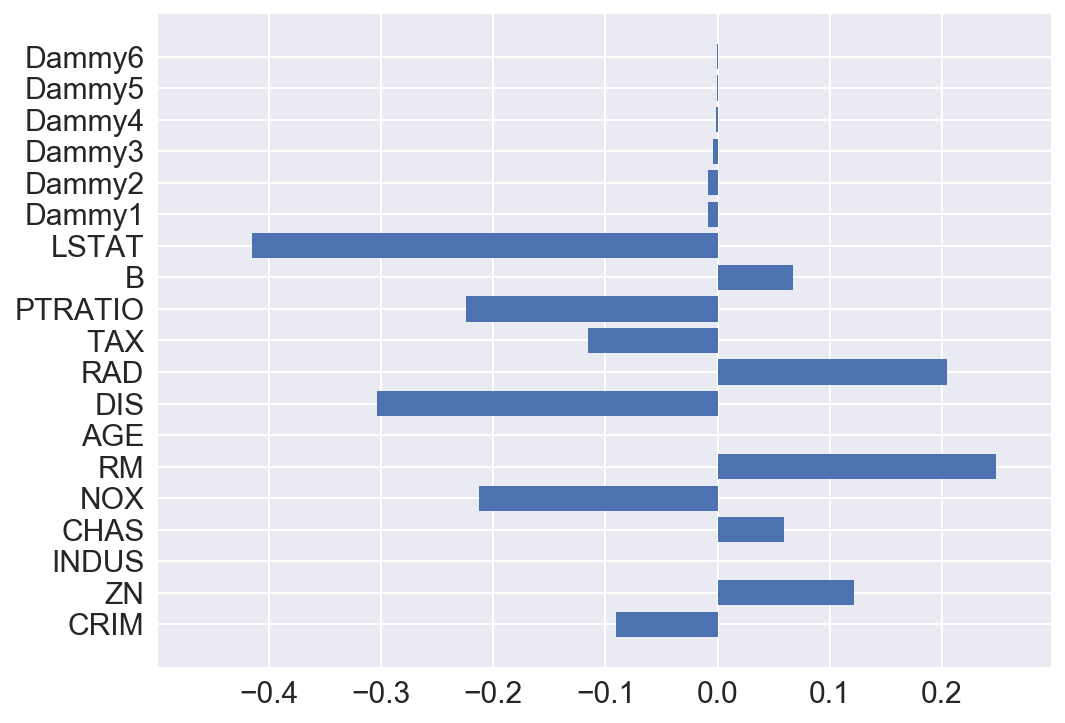

In [29]:
x_max = 1.2*max(elasticnet.coef_.flatten())
x_min = 1.2*min(elasticnet.coef_.flatten())
plt.figure(figsize=(8, 6))
plt.barh(np.arange(len(X_cname)), elasticnet.coef_.flatten())
plt.yticks(np.arange(len(X_cname)), X_cname)
plt.xlim(x_min, x_max)
plt.show()

In [30]:
print(pd.Series(data=elasticnet.coef_.flatten(), index=X_cname, name="coefficient", dtype='float').to_string())

CRIM      -0.090439
ZN         0.122119
INDUS     -0.000000
CHAS       0.059249
NOX       -0.212548
RM         0.248192
AGE        0.000000
DIS       -0.304036
RAD        0.204859
TAX       -0.115337
PTRATIO   -0.224852
B          0.067702
LSTAT     -0.415720
Dammy1    -0.008261
Dammy2    -0.008082
Dammy3    -0.003978
Dammy4    -0.001313
Dammy5    -0.000326
Dammy6    -0.000065


In [99]:
alphas = np.logspace(5,-10,50)
l1_ratios = np.arange(0.1,1.0,0.1)

df_scores_train = [[0] * len(alphas) for i in range(0, len(l1_ratios))]
df_aic_train = [[0] * len(alphas) for i in range(0, len(l1_ratios))]
df_scores_test = [[0] * len(alphas) for i in range(0, len(l1_ratios))]
df_aic_test = [[0] * len(alphas) for i in range(0, len(l1_ratios))]

j=0
for each_l1 in l1_ratios:
    i = 0
    for each in alphas:   
        elasticnet = linear_model.ElasticNet(alpha = each, l1_ratio = each_l1, random_state=0)
        elasticnet.fit(X_std, y_std)
    
        df_scores_train[j][i]=(elasticnet.score(X_train, y_train))
        df_aic_train[j][i]=(AIC(y_train, elasticnet.predict(X_train).flatten(), elasticnet))
        df_scores_test[j][i]=(elasticnet.score(X_test, y_test))
        df_aic_test[j][i]=(AIC(y_test, elasticnet.predict(X_test).flatten(), elasticnet))
        i+=1
    j+=1

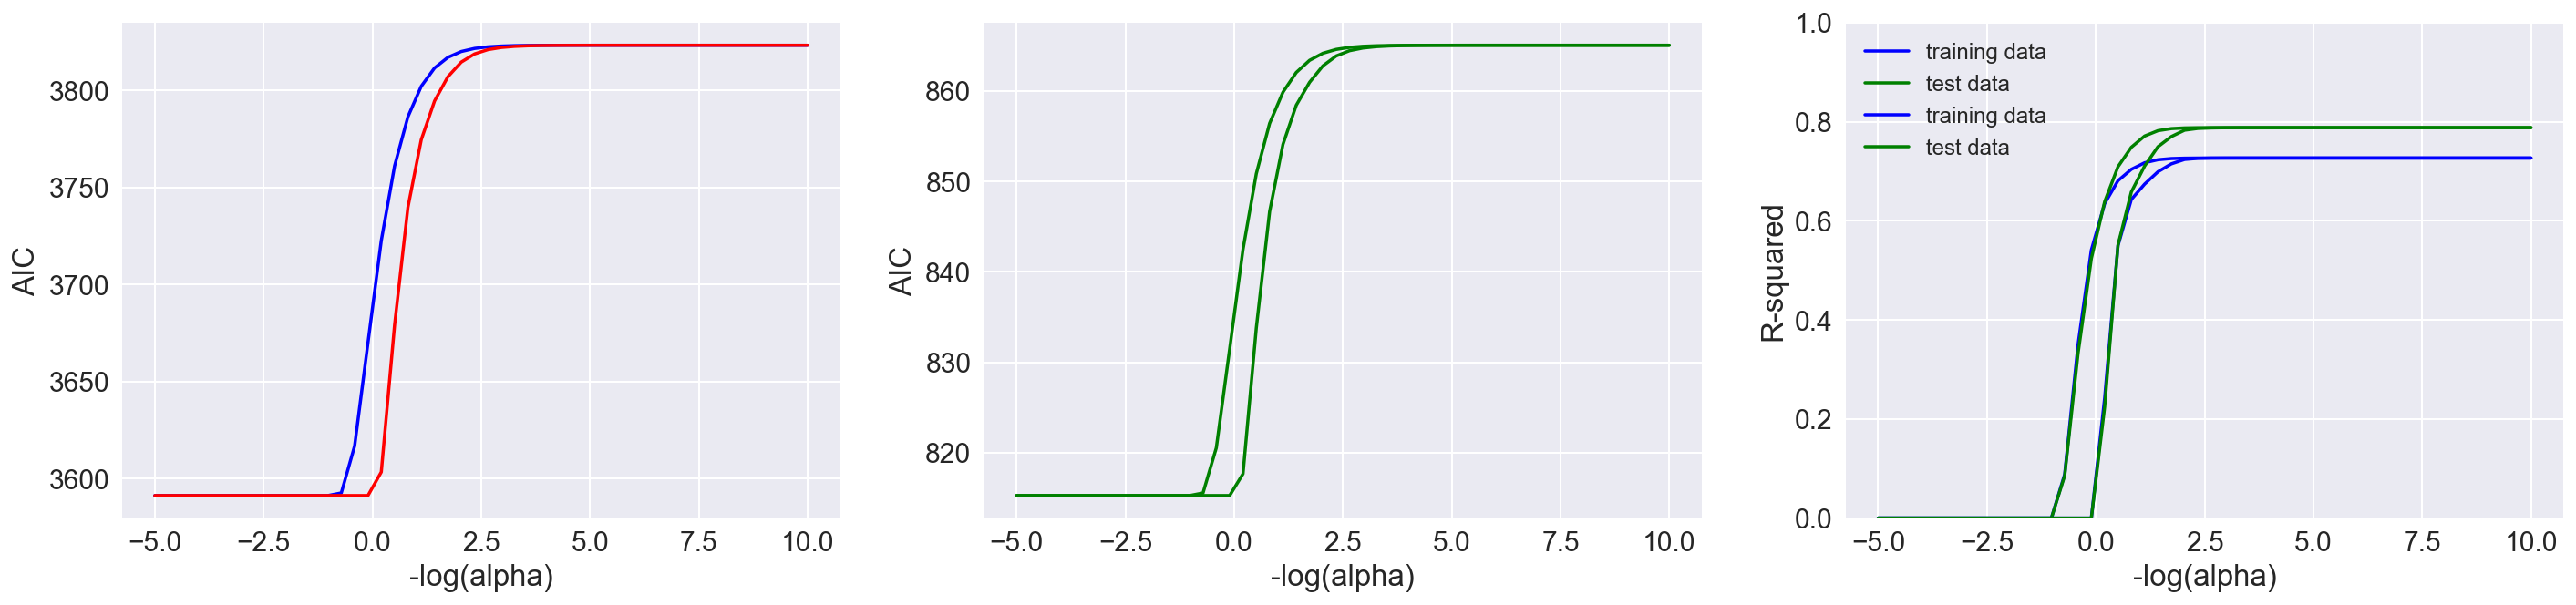

In [104]:
plt.figure(figsize=(24, 5))
plt.subplot(1, 3, 1)
plt.plot(-np.log10(alphas), df_aic_train[0][:], label="training data", color='blue')
plt.plot(-np.log10(alphas), df_aic_train[8][:], label="training data", color='r')
plt.xlabel('-log(alpha)')
plt.ylabel('AIC')

plt.subplot(1, 3, 2)
plt.plot(-np.log10(alphas), df_aic_test[0][:], label="test data", color='green')
plt.plot(-np.log10(alphas), df_aic_test[8][:], label="test data", color='green')


plt.xlabel('-log(alpha)')
plt.ylabel('AIC')

plt.subplot(1, 3, 3)
plt.plot(-np.log10(alphas), df_scores_train[0][:], label="training data", color='blue')
plt.plot(-np.log10(alphas), df_scores_test[0][:], label="test data", color='green')
plt.plot(-np.log10(alphas), df_scores_train[8][:], label="training data", color='blue')
plt.plot(-np.log10(alphas), df_scores_test[8][:], label="test data", color='green')


plt.xlabel('-log(alpha)')
plt.ylabel('R-squared')
plt.ylim(0, 1)
plt.legend(loc='upper left', shadow=True, ncol=1, fontsize=12)
plt.show()

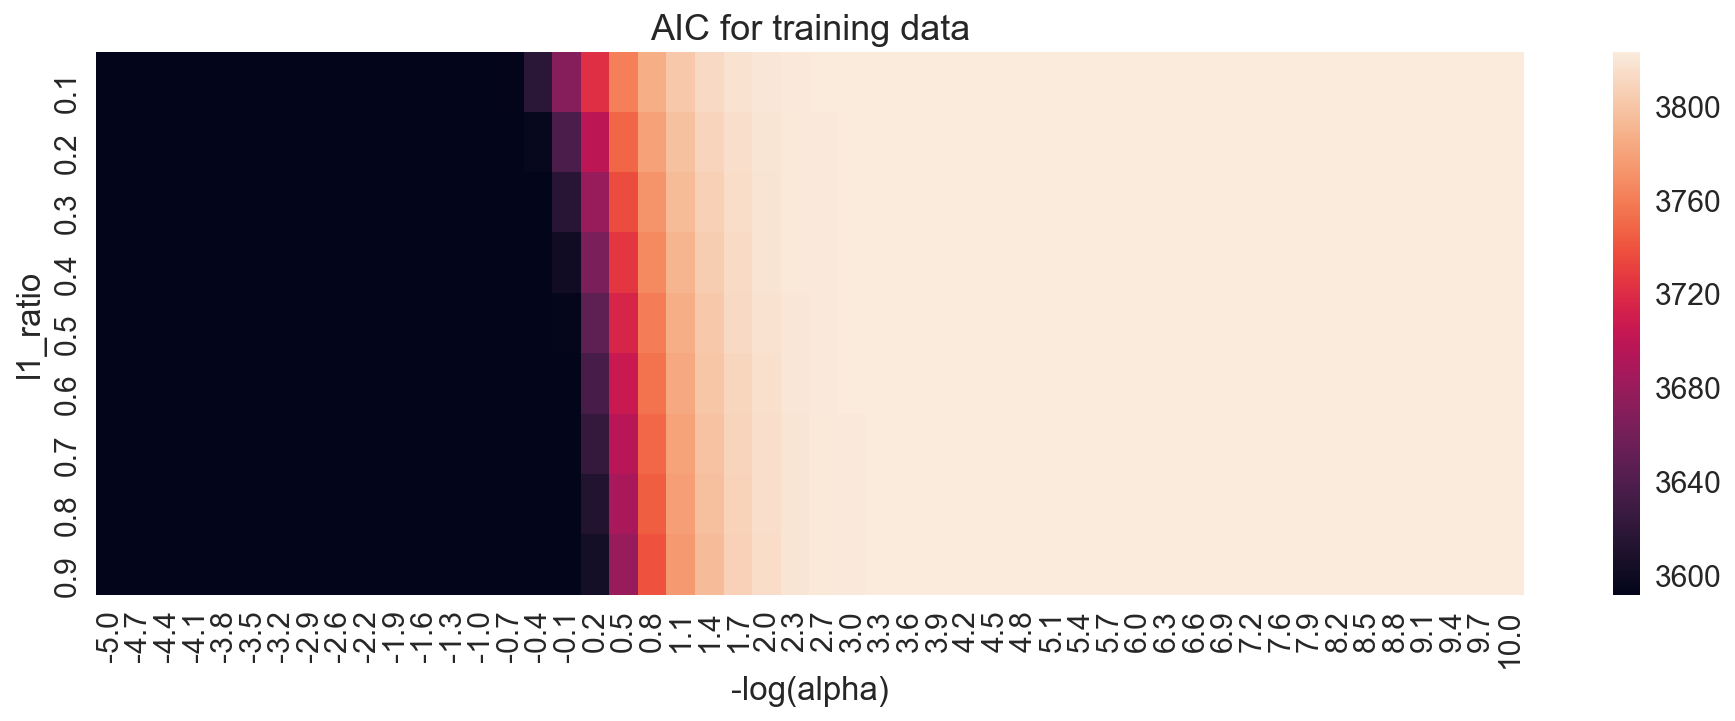

In [175]:
plt.subplots(figsize=(16,5))
hm = sns.heatmap(df_aic_train, cbar=True, square=False, yticklabels=l1_ratios, xticklabels=np.round(-np.log10(alphas),1))
plt.title('AIC for training data')
plt.xlabel('-log(alpha)')
plt.ylabel('l1_ratio')
plt.show()

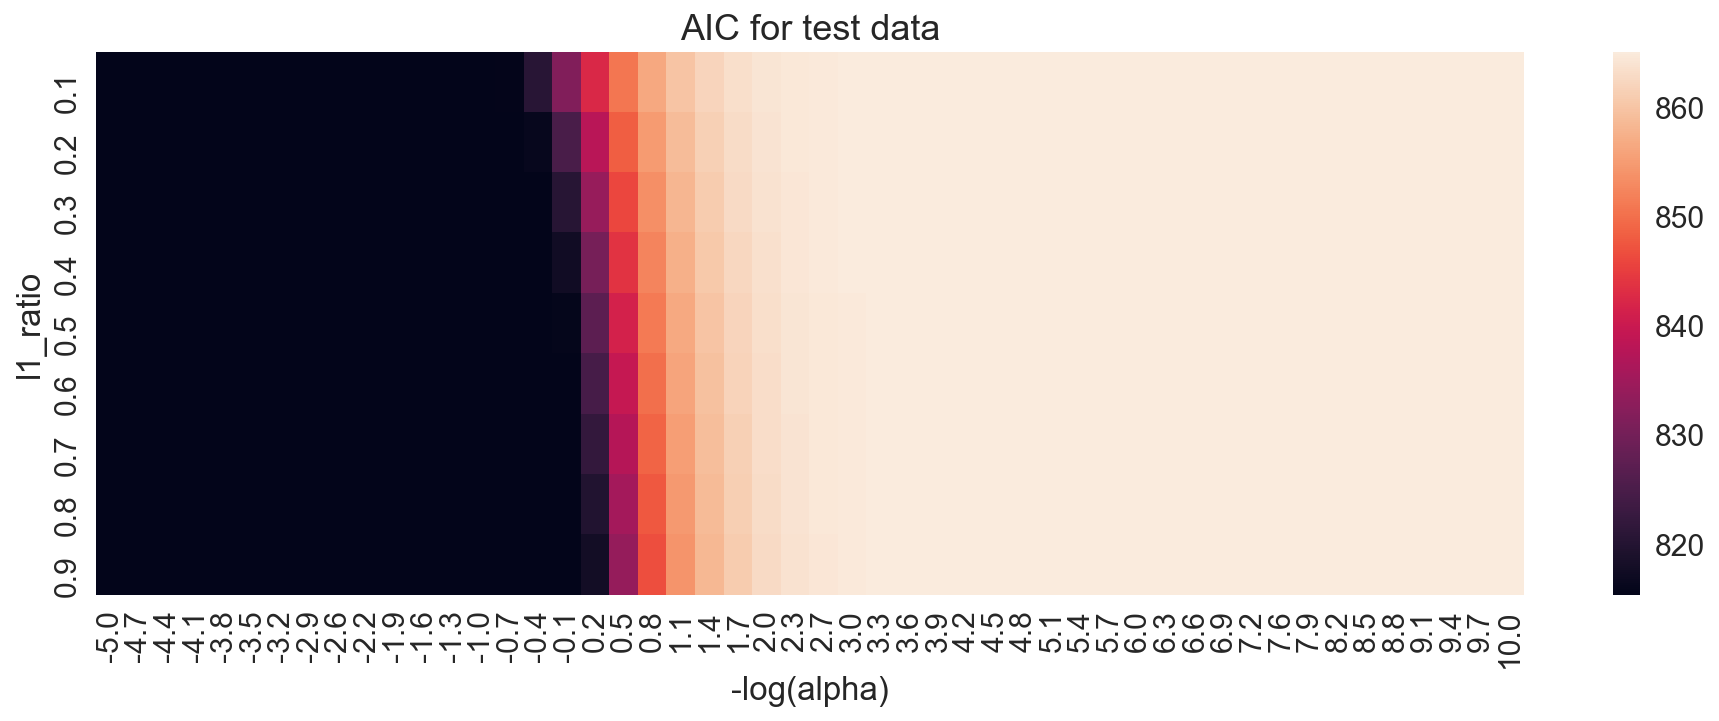

In [176]:
plt.subplots(figsize=(16,5))
hm = sns.heatmap(df_aic_test, cbar=True, square=False, yticklabels=l1_ratios, xticklabels=np.round(-np.log10(alphas),1))
plt.title('AIC for test data')
plt.xlabel('-log(alpha)')
plt.ylabel('l1_ratio')
plt.show()

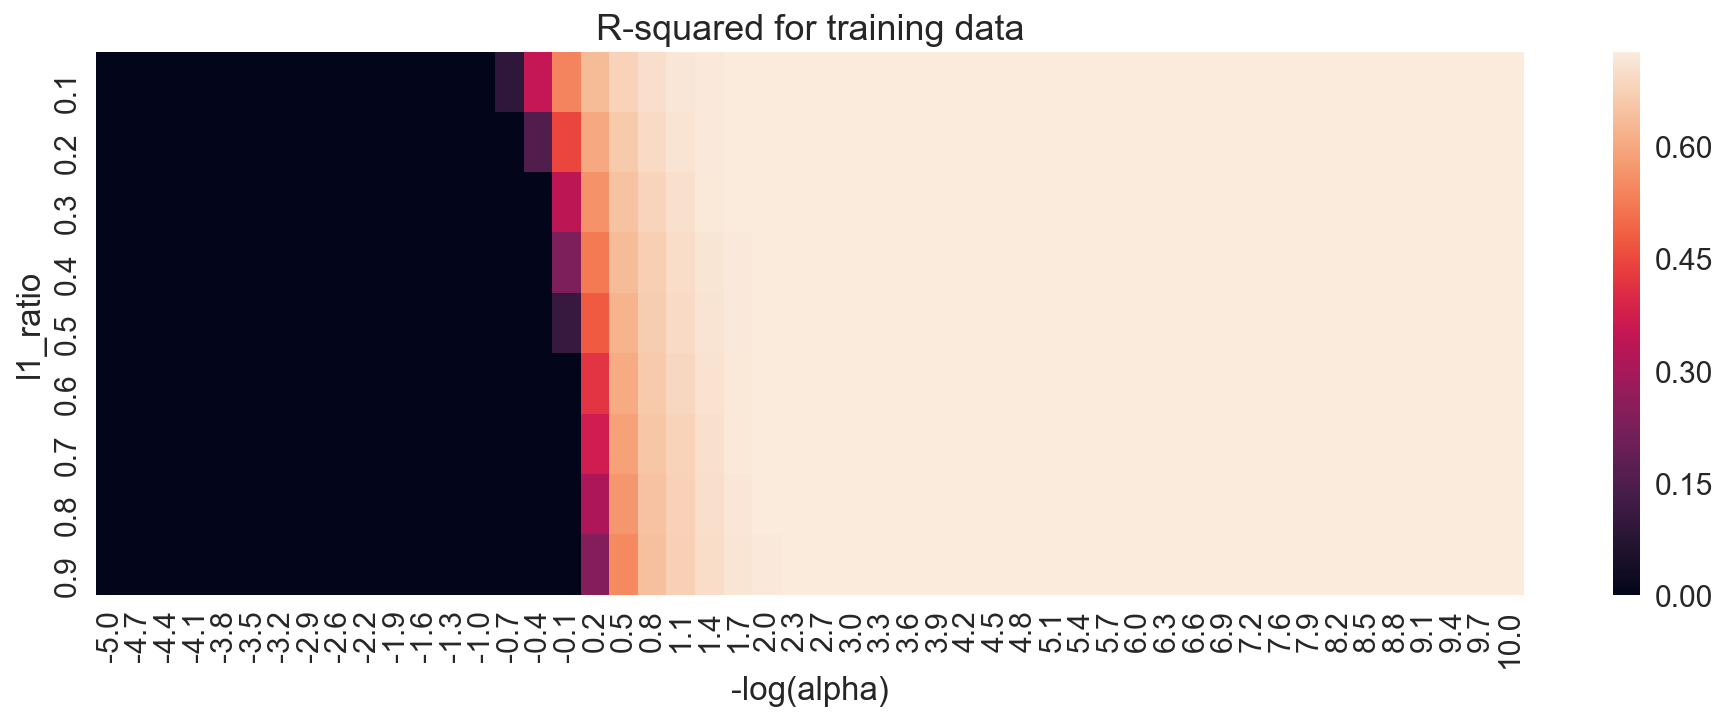

In [177]:
plt.subplots(figsize=(16,5))
hm = sns.heatmap(df_scores_train, cbar=True, square=False, yticklabels=l1_ratios, xticklabels=np.round(-np.log10(alphas),1))
plt.title('R-squared for training data')
plt.xlabel('-log(alpha)')
plt.ylabel('l1_ratio')
plt.show()

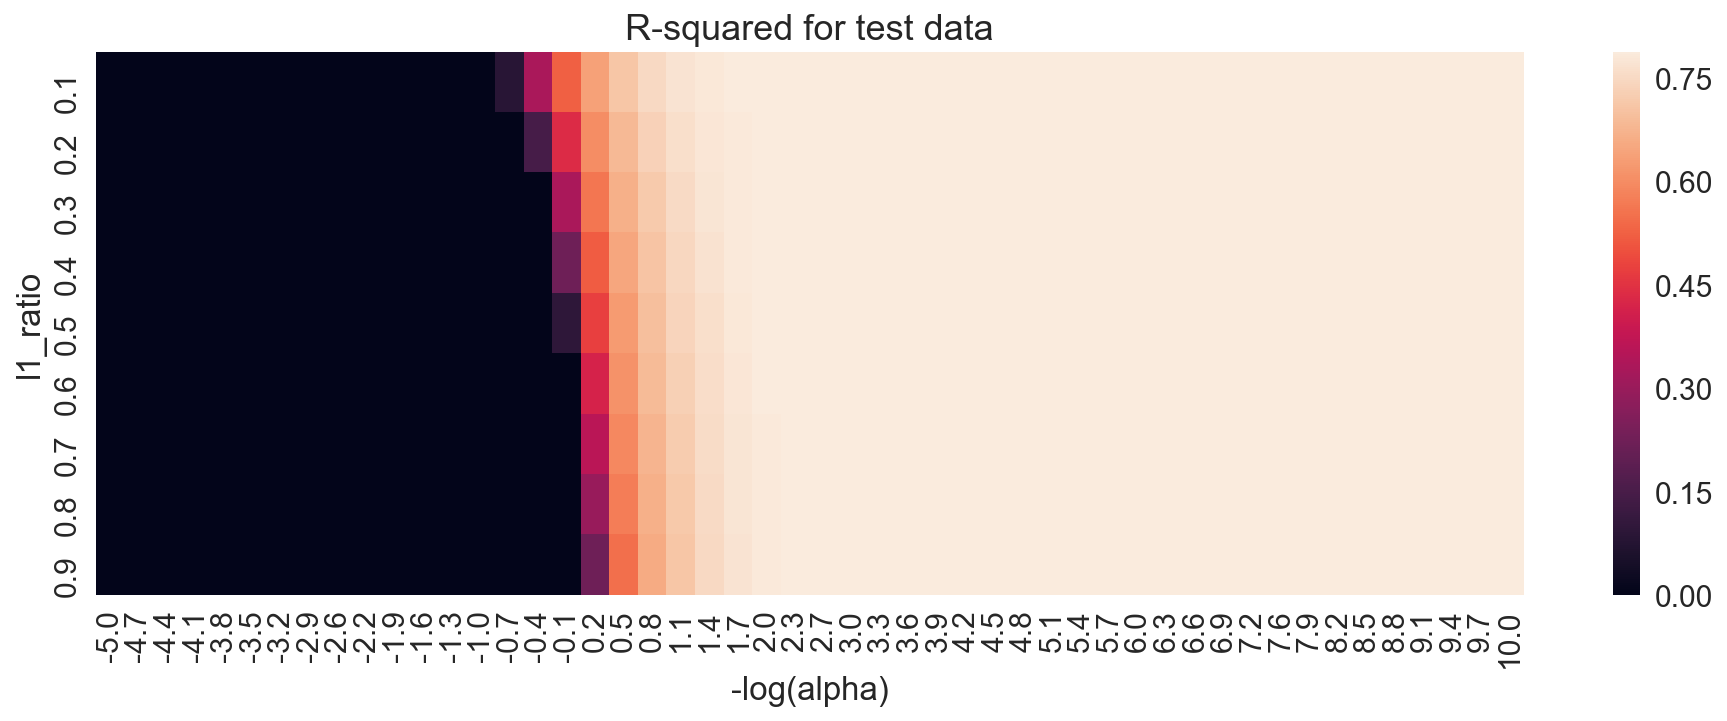

In [178]:
plt.subplots(figsize=(16,5))
hm = sns.heatmap(df_scores_test, cbar=True, square=False, yticklabels=l1_ratios, xticklabels=np.round(-np.log10(alphas),1))
plt.title('R-squared for test data')
plt.xlabel('-log(alpha)')
plt.ylabel('l1_ratio')
plt.show()

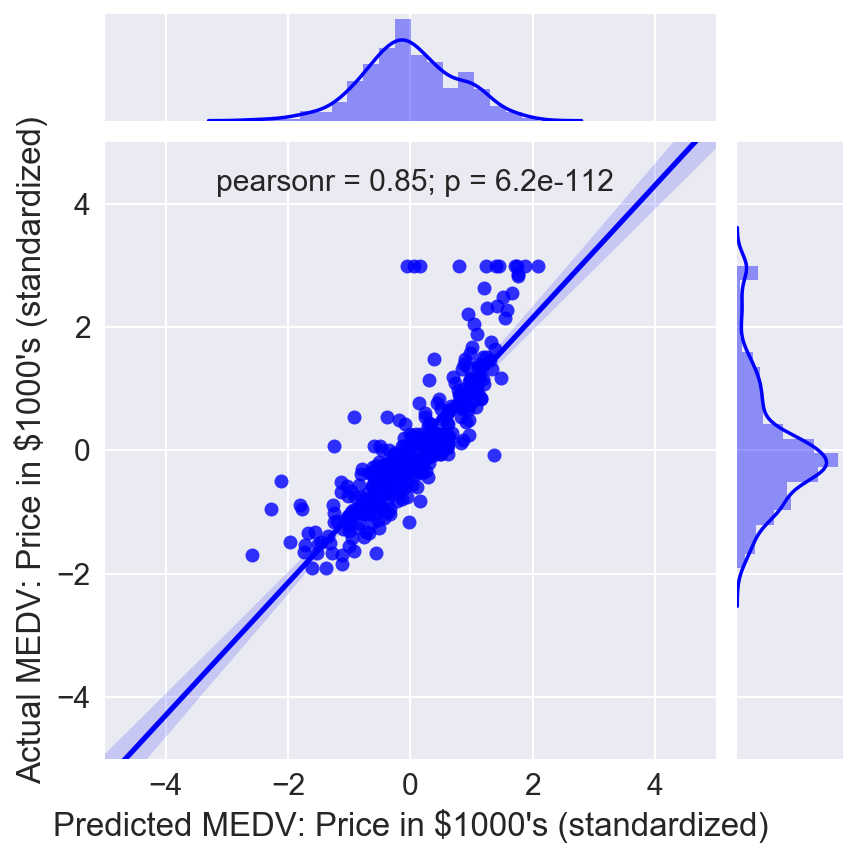

In [189]:
elasticnet = linear_model.ElasticNet(alpha = 10e-2, l1_ratio = 0.1, random_state=0)
elasticnet.fit(X_train, y_train)
sns.jointplot(elasticnet.predict(X_train).flatten(), y_train.flatten(), kind="reg",ylim=[-5, 5], xlim=[-5, 5], color="blue")
plt.xlabel('Predicted MEDV: Price in $1000\'s (standardized)')
plt.ylabel('Actual MEDV: Price in $1000\'s (standardized)')
plt.show()

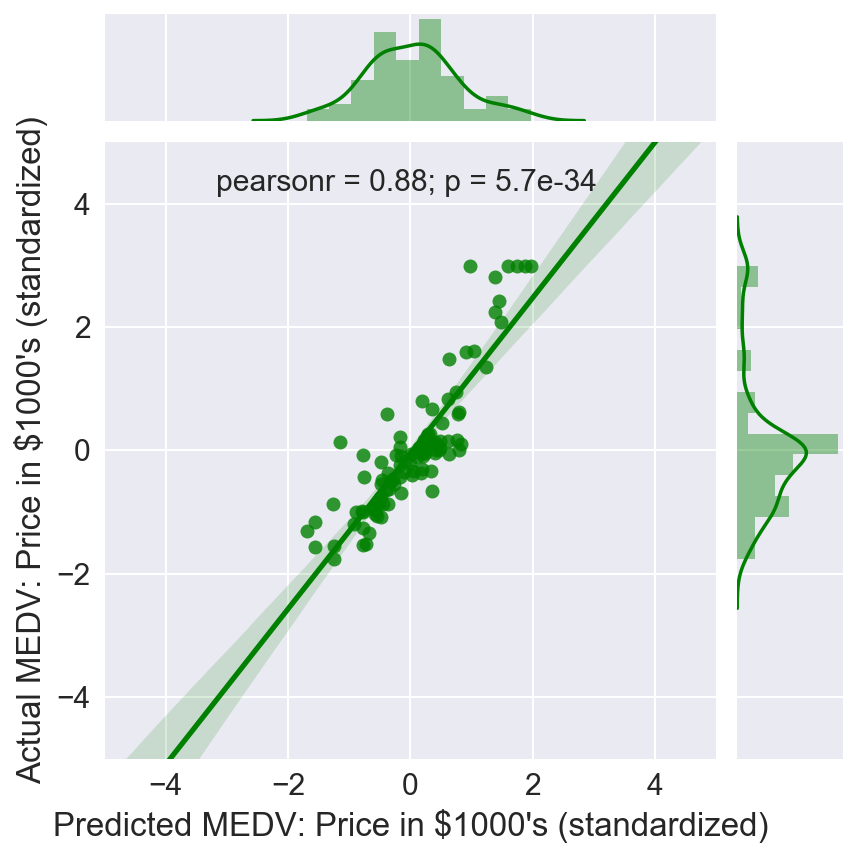

In [190]:
elasticnet = linear_model.ElasticNet(alpha = 10e-2, l1_ratio = 0.1, random_state=0)
elasticnet.fit(X_train, y_train)
sns.jointplot(elasticnet.predict(X_test).flatten(), y_test.flatten(), kind="reg",ylim=[-5, 5], xlim=[-5, 5], color="green")
plt.xlabel('Predicted MEDV: Price in $1000\'s (standardized)')
plt.ylabel('Actual MEDV: Price in $1000\'s (standardized)')
plt.show()

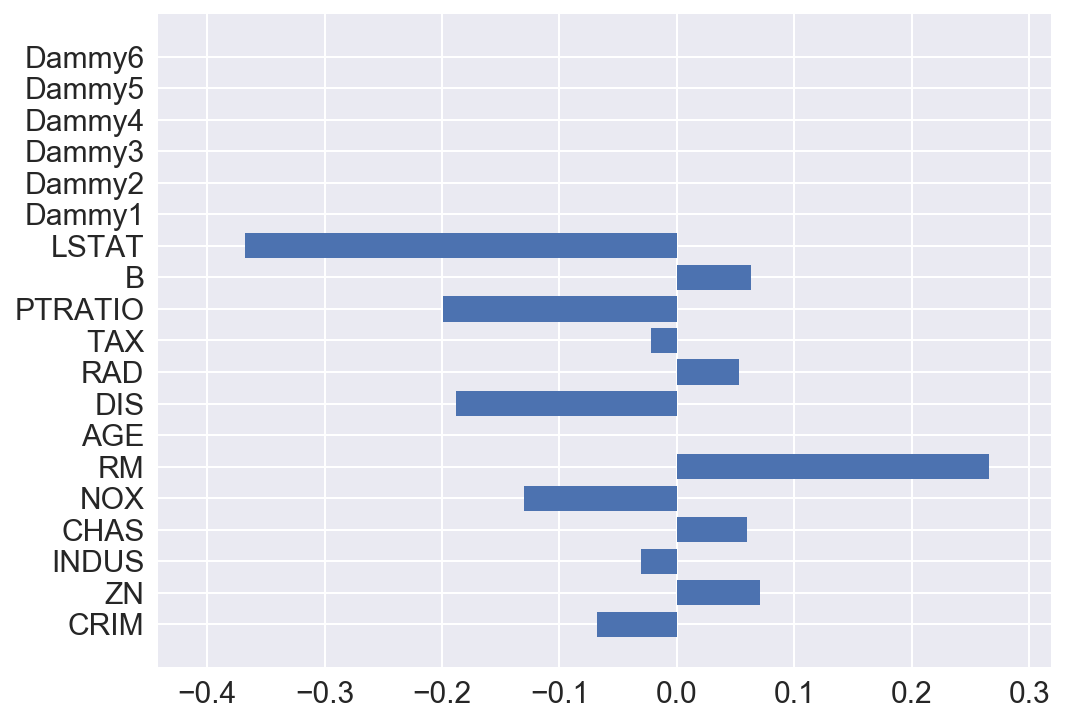

In [191]:
x_max = 1.2*max(elasticnet.coef_.flatten())
x_min = 1.2*min(elasticnet.coef_.flatten())
plt.figure(figsize=(8, 6))
plt.barh(np.arange(len(X_cname)), elasticnet.coef_.flatten())
plt.yticks(np.arange(len(X_cname)), X_cname)
plt.xlim(x_min, x_max)
plt.show()

In [192]:
print(pd.Series(data=elasticnet.coef_.flatten(), index=X_cname, name="coefficient", dtype='float').to_string())

CRIM      -0.067833
ZN         0.070720
INDUS     -0.030627
CHAS       0.059822
NOX       -0.130181
RM         0.265754
AGE       -0.000000
DIS       -0.187886
RAD        0.052746
TAX       -0.021736
PTRATIO   -0.199041
B          0.062792
LSTAT     -0.367926
Dammy1    -0.000000
Dammy2    -0.000000
Dammy3    -0.000000
Dammy4    -0.000000
Dammy5    -0.000000
Dammy6    -0.000000
